**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
local_path = "C:\\Greenwich\\MSc Project\\project_code\\"
store_local = False

**Load Data**

In [3]:
cyberbullying_raw_data = pd.read_csv("https://github.com/Voldegin/hate_speech_detection/blob/develop/data/cyberbullying_tweets.csv?raw=true")

In [4]:
cyberbullying_raw_data

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [5]:
malignant_raw_data = pd.read_csv("https://github.com/Voldegin/hate_speech_detection/blob/develop/data/malignant_comments/train.csv?raw=true")

In [6]:
malignant_raw_data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


**The two sets of data have different levels of classification on output columns where one distinguishes based on the intensity of bullying while the other distinguishes based on the type of bullying.
It will be easier to bring the two sets of data together by creating new column which identifies whether the tweet is cyberbullying or not.**

In [7]:
# Function to convert malignant data into a format to create new column 'is_cyberbullying'
def convert_malignant_tweets_format(data):
    new_data = pd.DataFrame()
    new_data['tweet_text'] = data['comment_text']
    new_data['actual_value'] = data.apply(lambda row: row[row == 1].index.tolist(), axis=1)
    new_data['is_cyberbullying'] = np.where(new_data['actual_value'].apply(lambda x:len(x)) == 0,0,1)
    return new_data

**Creating new column for identifying bullying**

In [8]:
malignant_data = convert_malignant_tweets_format(malignant_raw_data)

In [9]:
cyberbullying_data = cyberbullying_raw_data.copy()
cyberbullying_data['is_cyberbullying'] = np.where(cyberbullying_data['cyberbullying_type'] == 'not_cyberbullying',0,1)

In [10]:
malignant_data.head()

,tweet_text,actual_value,is_cyberbullying
0,Explanation\nWhy the edits made under my usern...,[],0
1,D'aww! He matches this background colour I'm s...,[],0
2,"Hey man, I'm really not trying to edit war. It...",[],0
3,"""\nMore\nI can't make any real suggestions on ...",[],0
4,"You, sir, are my hero. Any chance you remember...",[],0


In [11]:
cyberbullying_data.head()

,tweet_text,cyberbullying_type,is_cyberbullying
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0


**Since the main data being focuses is the dataset with cyberbullying types, more detailed analysis will be performed on this dataset**

In [12]:
bullying_data = cyberbullying_data[cyberbullying_data['is_cyberbullying'] == 1]
not_bullying_data = cyberbullying_data[cyberbullying_data['is_cyberbullying'] == 0]

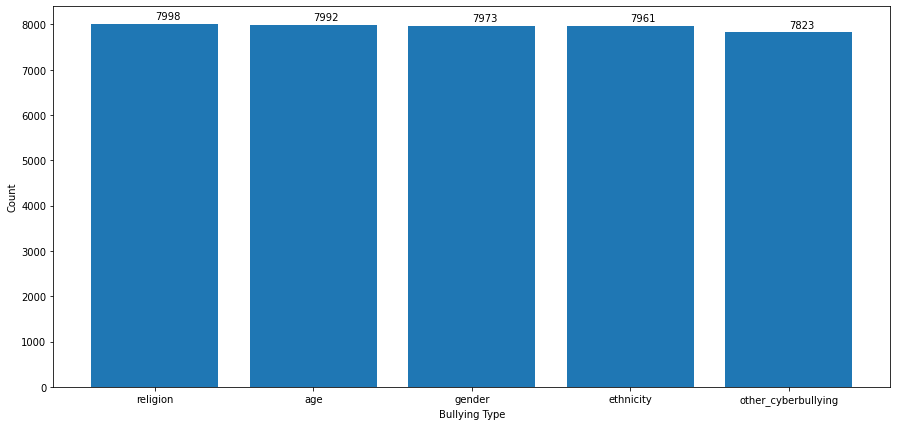

In [13]:
type_count = bullying_data['cyberbullying_type'].value_counts().reset_index()

plt.figure(figsize=(15,7))
plt.bar(type_count['index'],type_count['cyberbullying_type'])

for index, value in enumerate(type_count['cyberbullying_type'].tolist()):
    plt.text(index, value + (value/75),str(value))

plt.xlabel('Bullying Type')
plt.ylabel('Count')
plt.show()

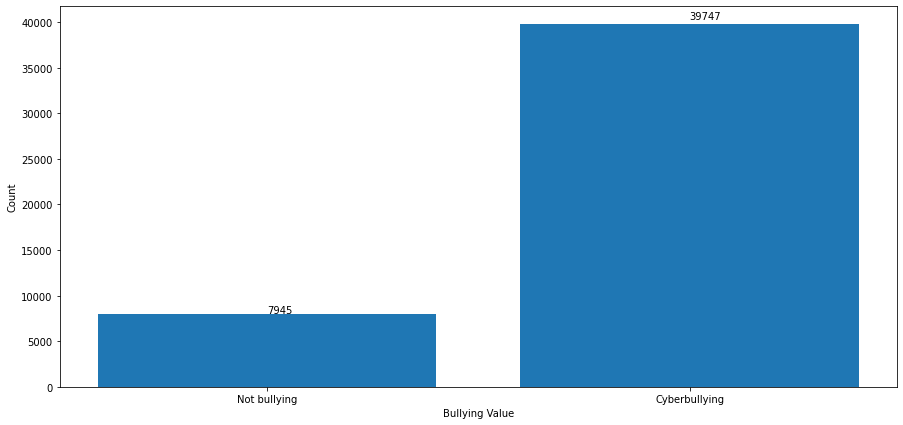

In [14]:
bully_count = cyberbullying_data['is_cyberbullying'].value_counts().reset_index()
bully_count.sort_values('is_cyberbullying',inplace=True)

plt.figure(figsize=(15,7))
plt.bar(bully_count['index'],bully_count['is_cyberbullying'])

for index, value in enumerate(bully_count['is_cyberbullying'].tolist()):
    plt.text(index, value + (value/75),str(value))

plt.xlabel('Bullying Value')
plt.xticks(ticks=[0,1], labels=['Not bullying', 'Cyberbullying'])
plt.ylabel('Count')
plt.show()

**The number of non-bulling tweets is low compared to the bullying tweets. This result is expected as the main part of train data constitutes of tweets split based on the type of cyberbullying. Since the major focus is to identify whether the tweets are bullying and not on the type of bullying the number of non-bullying tweets can be increased for better balanced data as model input.**

**This can be performed by adding more non bullying tweets from the second dataset**

**Although the datasets have been made similiar, the length of tweet text in both the datatsets needs to be checked before adding tweets from one dataset to other.**

**The length of the tweets will also enable to identify if any outliers are present or not**

**Storing unbalanced data with test data before moving to balanced data**

In [15]:
def create_test_data(data, size=4000):
    not_malignant_tweets = data[data['is_cyberbullying'] == 0]
    malignant_tweets = data[data['is_cyberbullying'] == 1]
    not_malignant_subset = not_malignant_tweets.sample(n=size//2, random_state=23)
    malignant_subset = malignant_tweets.sample(n=size//2, random_state=23)
    test_data = pd.concat([not_malignant_subset,malignant_subset])
    return test_data

In [16]:
test_data = create_test_data(malignant_data)
test_data.head()

,tweet_text,actual_value,is_cyberbullying
32504,"Oppose For the sake of this decision, I don't ...",[],0
39965,REDIRECT Talk:Shabab Al-Bireh Institute,[],0
128463,Rutherford was a supporter of the Haultain gov...,[],0
66224,I didn't do it \n\nI didn't add improperly cit...,[],0
65530,"""Hang on a minute, scobey. I'm Irish. I'd just...",[],0


In [17]:
if store_local:
    cyberbullying_data.to_csv(local_path + "unbalanced_train_data.csv",index=False)
    test_data.to_csv(local_path + "unbalanced_test_data.csv",index=False)

**Checking tweet length and creating Balanced data**

In [18]:
def add_tweet_length(data):
    data['tweet_length'] = data['tweet_text'].str.len()
    data['length_group'] = pd.cut(data['tweet_length'], [0,100,200,300,400,500,1000,5000,10000], right=False)
    data.dropna(inplace=True)
    return data

In [19]:
cyberbullying_length_data = cyberbullying_data.copy()
cyberbullying_length_data = add_tweet_length(cyberbullying_length_data)

malignant_length_data = malignant_data.copy()
malignant_length_data = add_tweet_length(malignant_length_data)

In [20]:
def plot_length_bar(data):
    length_count = data['length_group'].value_counts().reset_index()
    length_count['sortkey'] = length_count['index'].map(lambda x : x.left)
    length_count.sort_values('sortkey',inplace=True)
    length_count['index'] = length_count['index'].astype(str).str.strip('()[]').str.replace(', ','-')

    plt.figure(figsize=(15,7))
    plt.bar(length_count['index'],length_count['length_group'])

    for index, value in enumerate(length_count['length_group'].tolist()):
        plt.text(index, value + (value/75),str(value))

    plt.xlabel('Length Group')
    plt.ylabel('Count')
    plt.show()
    return

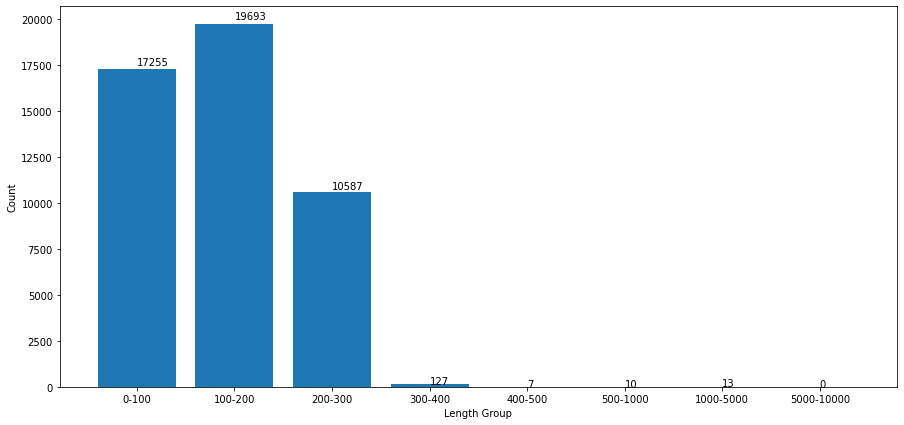

In [21]:
plot_length_bar(cyberbullying_length_data)

**Most of the tweets falls below the length of 400. Rest of the data can be dropped and data can be added from the malignant dataset to balance the dataset and create training data. Looking at length of malignant dataset lengths before adding data.**

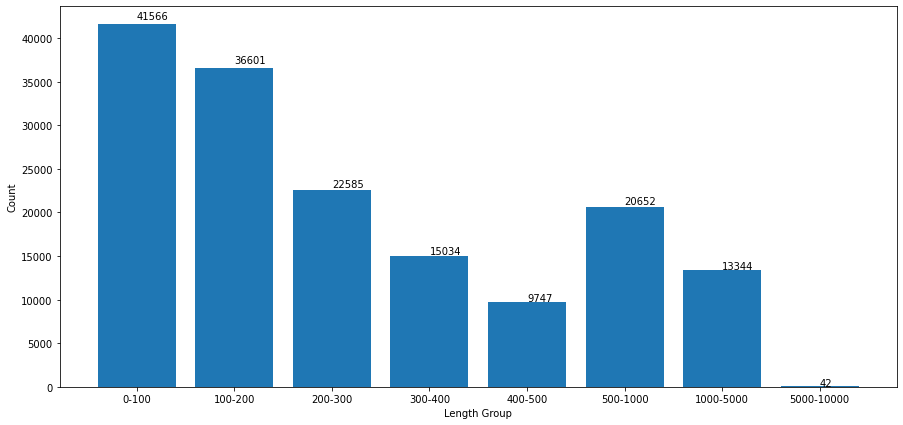

In [22]:
plot_length_bar(malignant_length_data)

**The size of tweet lengths more or less seems to be the same and filtering can be done to keep tweets with length less than 400 and then random sampling can be done to add tweets to create training data. Random sampling can be done from the remaining data to create the test data**

In [23]:
malignant_400_subset = malignant_length_data[malignant_length_data['tweet_length'] < 400]
malignant_not_bullying_400_subset = malignant_400_subset[malignant_400_subset['is_cyberbullying'] == 0]
malignant_not_bullying_400_subset

,tweet_text,actual_value,is_cyberbullying,tweet_length,length_group
0,Explanation\nWhy the edits made under my usern...,[],0,264,"[200, 300)"
1,D'aww! He matches this background colour I'm s...,[],0,112,"[100, 200)"
2,"Hey man, I'm really not trying to edit war. It...",[],0,233,"[200, 300)"
4,"You, sir, are my hero. Any chance you remember...",[],0,67,"[0, 100)"
5,"""\n\nCongratulations from me as well, use the ...",[],0,65,"[0, 100)"
...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",[],0,295,"[200, 300)"
159567,You should be ashamed of yourself \n\nThat is ...,[],0,99,"[0, 100)"
159568,"Spitzer \n\nUmm, theres no actual article for ...",[],0,81,"[0, 100)"
159569,And it looks like it was actually you who put ...,[],0,116,"[100, 200)"


In [24]:
additional_train_data_index = malignant_not_bullying_400_subset.sample(n=30000, random_state=23).index
transfer_malignant_data = malignant_data.loc[additional_train_data_index]

additional_train_data = transfer_malignant_data.copy()
additional_train_data['cyberbullying_type'] = 'not_cyberbullying'
additional_train_data.drop('actual_value',axis=1,inplace=True)

In [25]:
balanced_cyberbullying_data = pd.concat([cyberbullying_data,additional_train_data])

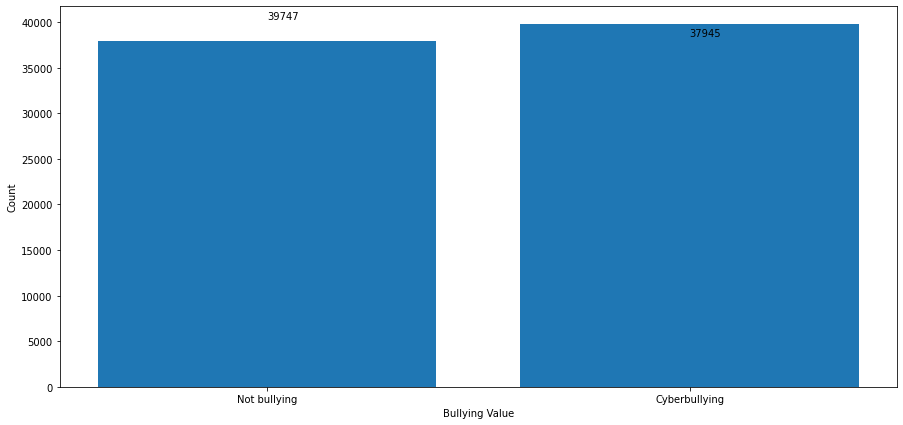

In [26]:
balanced_bully_count = balanced_cyberbullying_data['is_cyberbullying'].value_counts().reset_index()

plt.figure(figsize=(15,7))
plt.bar(balanced_bully_count['index'],balanced_bully_count['is_cyberbullying'])

for index, value in enumerate(balanced_bully_count['is_cyberbullying'].tolist()):
    plt.text(index, value + (value/75),str(value))

plt.xlabel('Bullying Value')
plt.xticks(ticks=[0,1], labels=['Not bullying', 'Cyberbullying'])
plt.ylabel('Count')
plt.show()

In [27]:
len(balanced_cyberbullying_data)

77692

**We will create a test data of size 7000, which is 10% of train_data**

In [28]:
remaining_malignant_data = malignant_data.drop(additional_train_data_index,axis=0)
balanced_test_data = create_test_data(remaining_malignant_data, 7000)
balanced_test_data

,tweet_text,actual_value,is_cyberbullying
24820,"""\n\nI decided on """"breached"""" as a term to de...",[],0
152454,Support Adding information regarding the 2007 ...,[],0
138828,Stick to topic \n\nI would suggest cleaning up...,[],0
106821,20 moments where e.g. or i.e. is used in an ar...,[],0
96673,"""\n\n ADHD \n\nIt was a fight there for a whil...",[],0
...,...,...,...
141407,User:Legacypac is the most evil wikipedian in ...,[malignant],1
123749,"In defence of China! \n\nHey Koreans, who the ...","[malignant, rude, abuse, loathe]",1
70284,o you dont understand that im not doing a damn...,"[malignant, rude]",1
25682,I'm not gonna bother with AGK and is a dick m...,"[malignant, rude]",1


In [29]:
if store_local:
    balanced_cyberbullying_data.to_csv(local_path + "balanced_train_data.csv",index=False)
    balanced_test_data.to_csv(local_path + "balanced_test_data.csv",index=False)